<table align="left">
  <td>
    <a href="https://is.gd/8goywA" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Problema Vendedor Viajero - The Salesman Problem

Dada una lista de ciudades y las distancias entre cada par de ciudades, encuentra el camino más corto posible que pase por todas las ciudades y vuelva a la ciudad de partida.


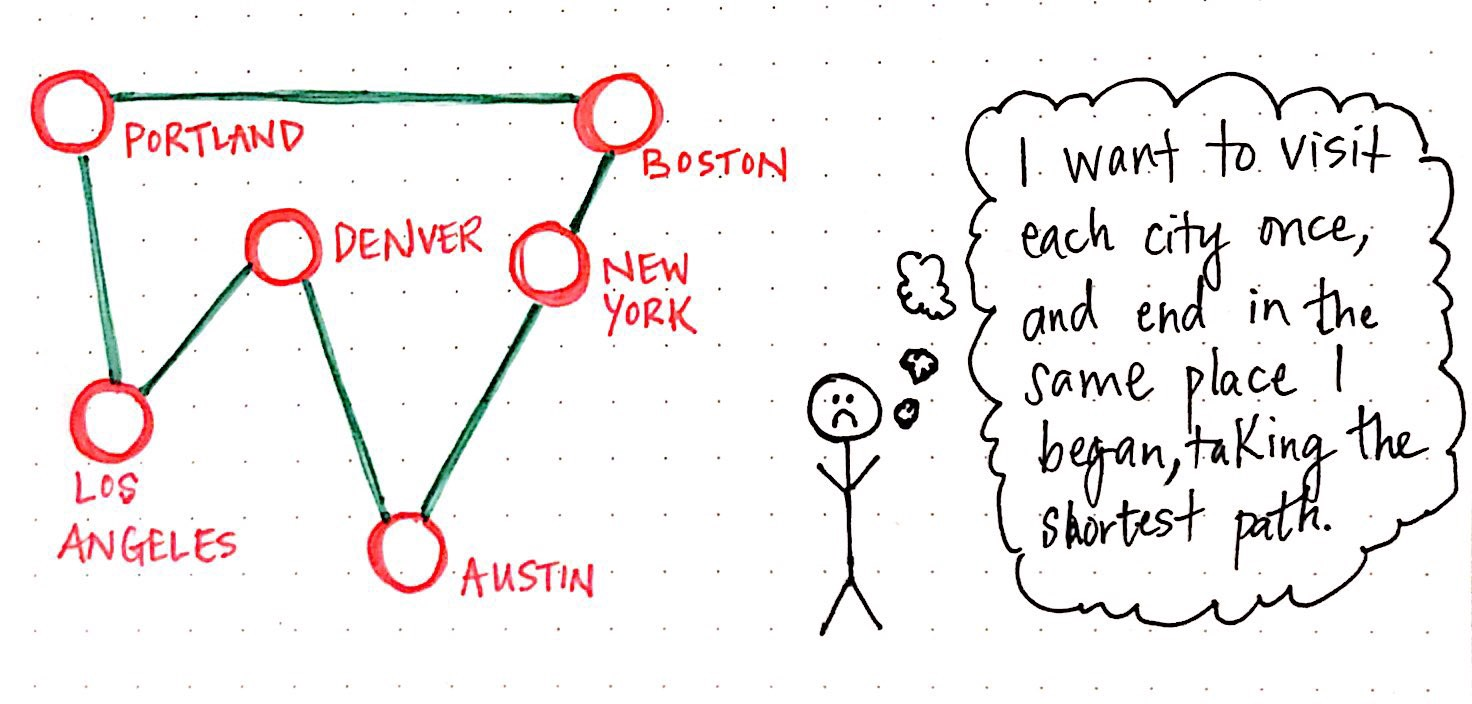

## Instalación de Paquetes

In [87]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [88]:
# Librerías que serán utilizadas
import array
import random
import json
import numpy as np
from deap import algorithms, base, creator, tools

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparación para Optimización
0. **Importar ciudades** (Datos iniciales)
1. **Función objetivo** 
2. **Variables de decisión**
3. **Operadores**

In [89]:
# Importar datos de las ciudades desde el drive
with open("/content/drive/MyDrive/Colab Notebooks/gr17.json", "r") as tsp_data:
  tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]
IND_SIZE = tsp["TourSize"]

In [90]:
# Función Objetivo
def objetive_function(individual):
  #codigo de la función
  #resultado retorna como tupla (result)
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,
  

In [91]:
# Creación estructura de fitness e individuo: https://deap.readthedocs.io/en/master/tutorials/basic/part1.html
##para problema de maximización el peso es positivo y minimización el peso es negativo

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [93]:
toolbox = base.Toolbox()

# Generador de atributos reales: nombre, función que genera cada variable, intervalo (limite superior e inferior)
toolbox.register("attr_int",random.sample, range(IND_SIZE), IND_SIZE) #genera los numeros entre min y max

# Generador de individuo
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_int)

# Generar la población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [94]:
#Inicializar Operadores: https://deap.readthedocs.io/en/master/api/tools.html
toolbox.register("evaluate",objetive_function)

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
toolbox.register("select",tools.selTournament, tournsize=3)

In [95]:
random.seed(169)
pop = toolbox.population(n=300)                # inicialização da pop
hof = tools.HallOfFame(1)                      # melhor indivíduo
stats = tools.Statistics(lambda ind:ind.fitness.values) # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)


# Optimización
Evolución

In [98]:
pop, log =algorithms.eaSimple(population=pop, toolbox=toolbox, cxpb=0.7, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=True)

    

gen	nevals	avg    	std    	min 	max 
0  	0     	2194.68	74.8591	2184	3030
1  	220   	2211.63	161.655	2184	3765
2  	233   	2208.97	143.299	2184	3410
3  	236   	2204.51	150.404	2184	3583
4  	221   	2204.62	149.141	2184	3749
5  	229   	2205.8 	120.876	2184	3318
6  	236   	2203.77	132.703	2184	3392
7  	211   	2200.82	114.264	2184	3669
8  	238   	2225.95	231.08 	2184	4499
9  	218   	2209.69	175.453	2184	4384
10 	222   	2214.54	192.537	2184	4371
11 	212   	2211.27	169.291	2184	3612
12 	222   	2200.8 	142.386	2184	3675
13 	215   	2225.62	206.301	2184	3727
14 	238   	2206.12	146.257	2184	3609
15 	224   	2201.62	115.287	2184	3381
16 	233   	2189.88	59.3322	2184	3146
17 	220   	2217.02	191.473	2184	3749
18 	234   	2192.34	77.4787	2184	3165
19 	235   	2204.51	124.023	2184	3311
20 	236   	2201.64	132.598	2184	3495
21 	221   	2216.16	184.03 	2184	4241
22 	232   	2205.47	121.939	2184	3247
23 	221   	2206.19	146.081	2184	3496
24 	227   	2215.48	174.488	2184	3583
25 	248   	2197.41	93.9861	2184	3247
2

# Resultados

In [97]:
# Mejor Solución
print("Mejor Individuo: ")
print(hof[0])

#validacióon del mejor individuo
print("Fitness:")
print(objetive_function(hof[0]))

Mejor Individuo: 
Individual('i', [7, 16, 6, 12, 3, 0, 15, 11, 8, 13, 14, 9, 1, 4, 10, 2, 5])
Fitness:
(2184,)
